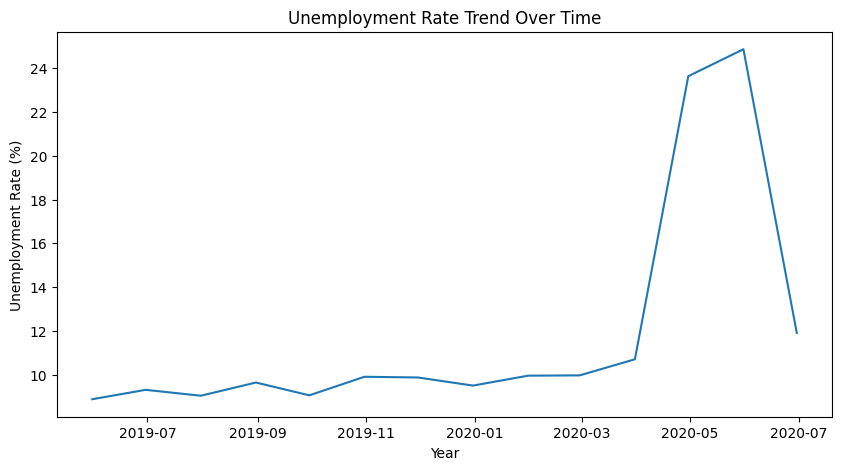

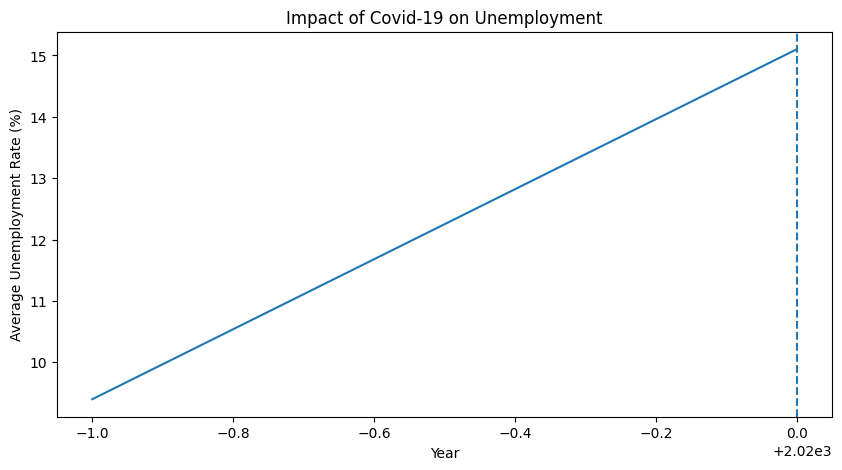

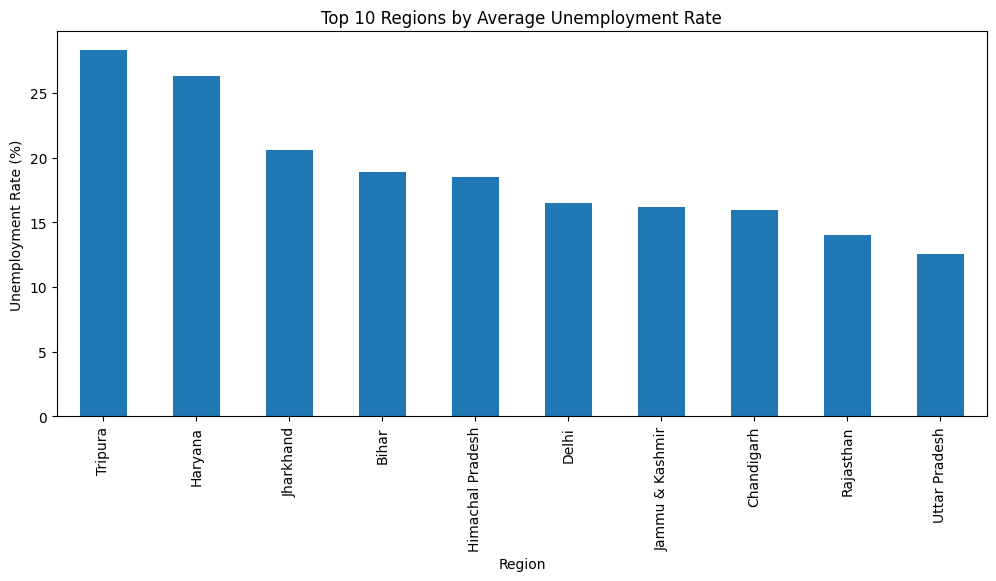

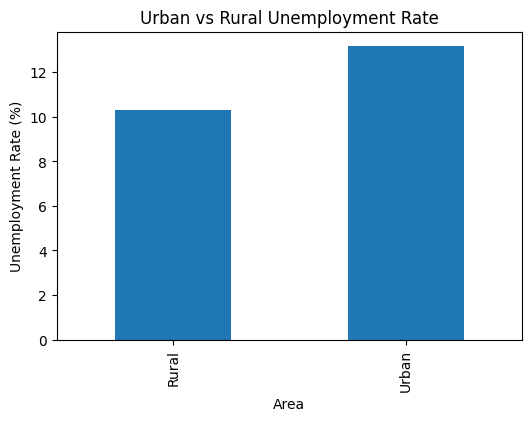

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Unemployment in India.csv")

# FIX: Strip column name spaces
df.columns = df.columns.str.strip()

# Drop missing values
df.dropna(inplace=True)

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Rename columns
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Create Year column
df['Year'] = df['Date'].dt.year

# ===============================
# ANALYSIS & VISUALIZATION
# ===============================

# Unemployment trend over time
monthly_trend = df.groupby('Date')['Unemployment_Rate'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_trend)
plt.title("Unemployment Rate Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Covid impact analysis
yearly_trend = df.groupby('Year')['Unemployment_Rate'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_trend)
plt.axvline(x=2020, linestyle='--')
plt.title("Impact of Covid-19 on Unemployment")
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()

# Region-wise unemployment
region_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
region_avg.head(10).plot(kind='bar')
plt.title("Top 10 Regions by Average Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Urban vs Rural comparison
area_avg = df.groupby('Area')['Unemployment_Rate'].mean()

plt.figure(figsize=(6, 4))
area_avg.plot(kind='bar')
plt.title("Urban vs Rural Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()
